<a href="https://www.kaggle.com/code/bsrsrc/diabetes-feature-engineering?scriptVersionId=187696091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div class="alert alert-primary" style="margin-top: 20px; background-color: #cce5ff; color: softblue;">

<h1><center>Diabetes Feature Engineering</center></h1>

</div>



![Açıklama](https://d2jx2rerrg6sh3.cloudfront.net/images/news/ImageForNews_733883_16711528404605542.jpg)

# About Dataset

<div style="background-color: #fff2e6; padding: 20px; border-radius: 10px; border: 1px solid #cc9966; color: #663300;">
A machine learning model is requested to be developed that can predict whether individuals have diabetes when their features are specified. Before developing the model, it is expected that necessary data analysis and feature engineering steps are performed.
</div>


<div style="background-color: #fff2e6; padding: 20px; border-radius: 10px; border: 1px solid #cc9966; color: #663300;">
This is part of a large dataset maintained by the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. The data was collected for a diabetes study conducted on Pima Indian women aged 21 and above living in Phoenix, the fifth largest city in the state of Arizona. The target variable 'outcome' is specified to indicate 1 for positive diabetes test results and 0 for negative results.
</div>

| Feature              | Description                                                                                   |
|----------------------|-----------------------------------------------------------------------------------------------|
| Pregnancies          | Number of times pregnant                                                                      |
| Glucose              | Plasma glucose concentration after 2 hours in an oral glucose tolerance test                   |
| Blood Pressure       | Diastolic blood pressure (mm Hg)                                                              |
| SkinThickness        | Triceps skin fold thickness (mm)                                                              |
| Insulin              | 2-Hour serum insulin (mu U/ml)                                                                |
| DiabetesPedigreeFunction | Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) |
| BMI                  | Body mass index (weight in kg/(height in m)^2)                                                |
| Age                  | Age in years                                                                                  |
| Outcome              | Target variable (0 or 1) indicating whether the person has diabetes                           |


# Importing

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pd.set_option("display.width", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

df_ = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")
df = df_.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [2]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


# Exploratory Data Analysis (EDA)¶

In [3]:
def check_df(df, head=5):
    print("#################### Shape ###################")
    print(df.shape)
    print("#################### Types ###################")
    print(df.dtypes)
    print("#################### Head ###################")
    print(df.head(head))
    print("#################### Tail ###################")
    print(df.tail(head))
    print("#################### NA ###################")
    print(df.isnull().sum())
    print("#################### Quantiles ###################")
    print(df.describe([0, 0.05, 0.50, 0.95, 1]).T)
check_df(df)


#################### Shape ###################
(768, 9)
#################### Types ###################
PREGNANCIES                   int64
GLUCOSE                       int64
BLOODPRESSURE                 int64
SKINTHICKNESS                 int64
INSULIN                       int64
BMI                         float64
DIABETESPEDIGREEFUNCTION    float64
AGE                           int64
OUTCOME                       int64
dtype: object
#################### Head ###################
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  DIABETESPEDIGREEFUNCTION  AGE  OUTCOME
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100    

# Variable Analysis

In [4]:
def grab_col_names(df, cat_th=10, car_th=20):

    """
    Provides the names of categorical, numerical, and categorical but cardinal variables in the dataset.

    Parameters
    ----------
    df : dataframe
        The dataframe from which variable names are to be obtained.
    cat_th: int, float
        Class threshold value for numerical but categorical variables.
    car_th: int, float
        Class threshold value for categorical but cardinal variables.

    Returns
    -------
    cat_cols: list
        List of categorical variables.
    num_cols: list
        List of numerical variables.
    cat_but_car: list
        List of cardinal-looking categorical variables.

    Notes
    -------
    cat_cols + num_cols + cat_but_car = total number of variables.
    num_but_cat is included in cat_col.

    """
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [5]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
GLUCOSE,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BLOODPRESSURE,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SKINTHICKNESS,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
INSULIN,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DIABETESPEDIGREEFUNCTION,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
AGE,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


In [6]:
df[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
OUTCOME,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df["OUTCOME"].mean()

0.3489583333333333

In [8]:
for col in cat_cols:
    if col != "OUTCOME":
        print(df.groupby(col)["OUTCOME"].mean)
    else:
        print("no")

no


In [9]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df,col)

         OUTCOME  Ratio
OUTCOME                
0            500 65.104
1            268 34.896
##########################################


In [10]:
df.groupby("OUTCOME")[num_cols].mean()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
OUTCOME,,,,,,,,
0,3.298,109.980,68.184,19.664,68.792,30.304,0.430,31.190
1,4.866,141.257,70.825,22.164,100.336,35.143,0.550,37.067


# Target Summary

In [11]:
def target_summary_with_num(df, target, num_col):
    print(df.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "OUTCOME", col)

         PREGNANCIES
OUTCOME             
0              3.298
1              4.866


         GLUCOSE
OUTCOME         
0        109.980
1        141.257


         BLOODPRESSURE
OUTCOME               
0               68.184
1               70.825


         SKINTHICKNESS
OUTCOME               
0               19.664
1               22.164


         INSULIN
OUTCOME         
0         68.792
1        100.336


           BMI
OUTCOME       
0       30.304
1       35.143


         DIABETESPEDIGREEFUNCTION
OUTCOME                          
0                           0.430
1                           0.550


           AGE
OUTCOME       
0       31.190
1       37.067




# Correlation Analysis

In [12]:
corr_matrix = df[num_cols].corr()
corr_matrix

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
PREGNANCIES,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544
GLUCOSE,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264
BLOODPRESSURE,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240
SKINTHICKNESS,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114
INSULIN,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036
DIABETESPEDIGREEFUNCTION,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034
AGE,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000


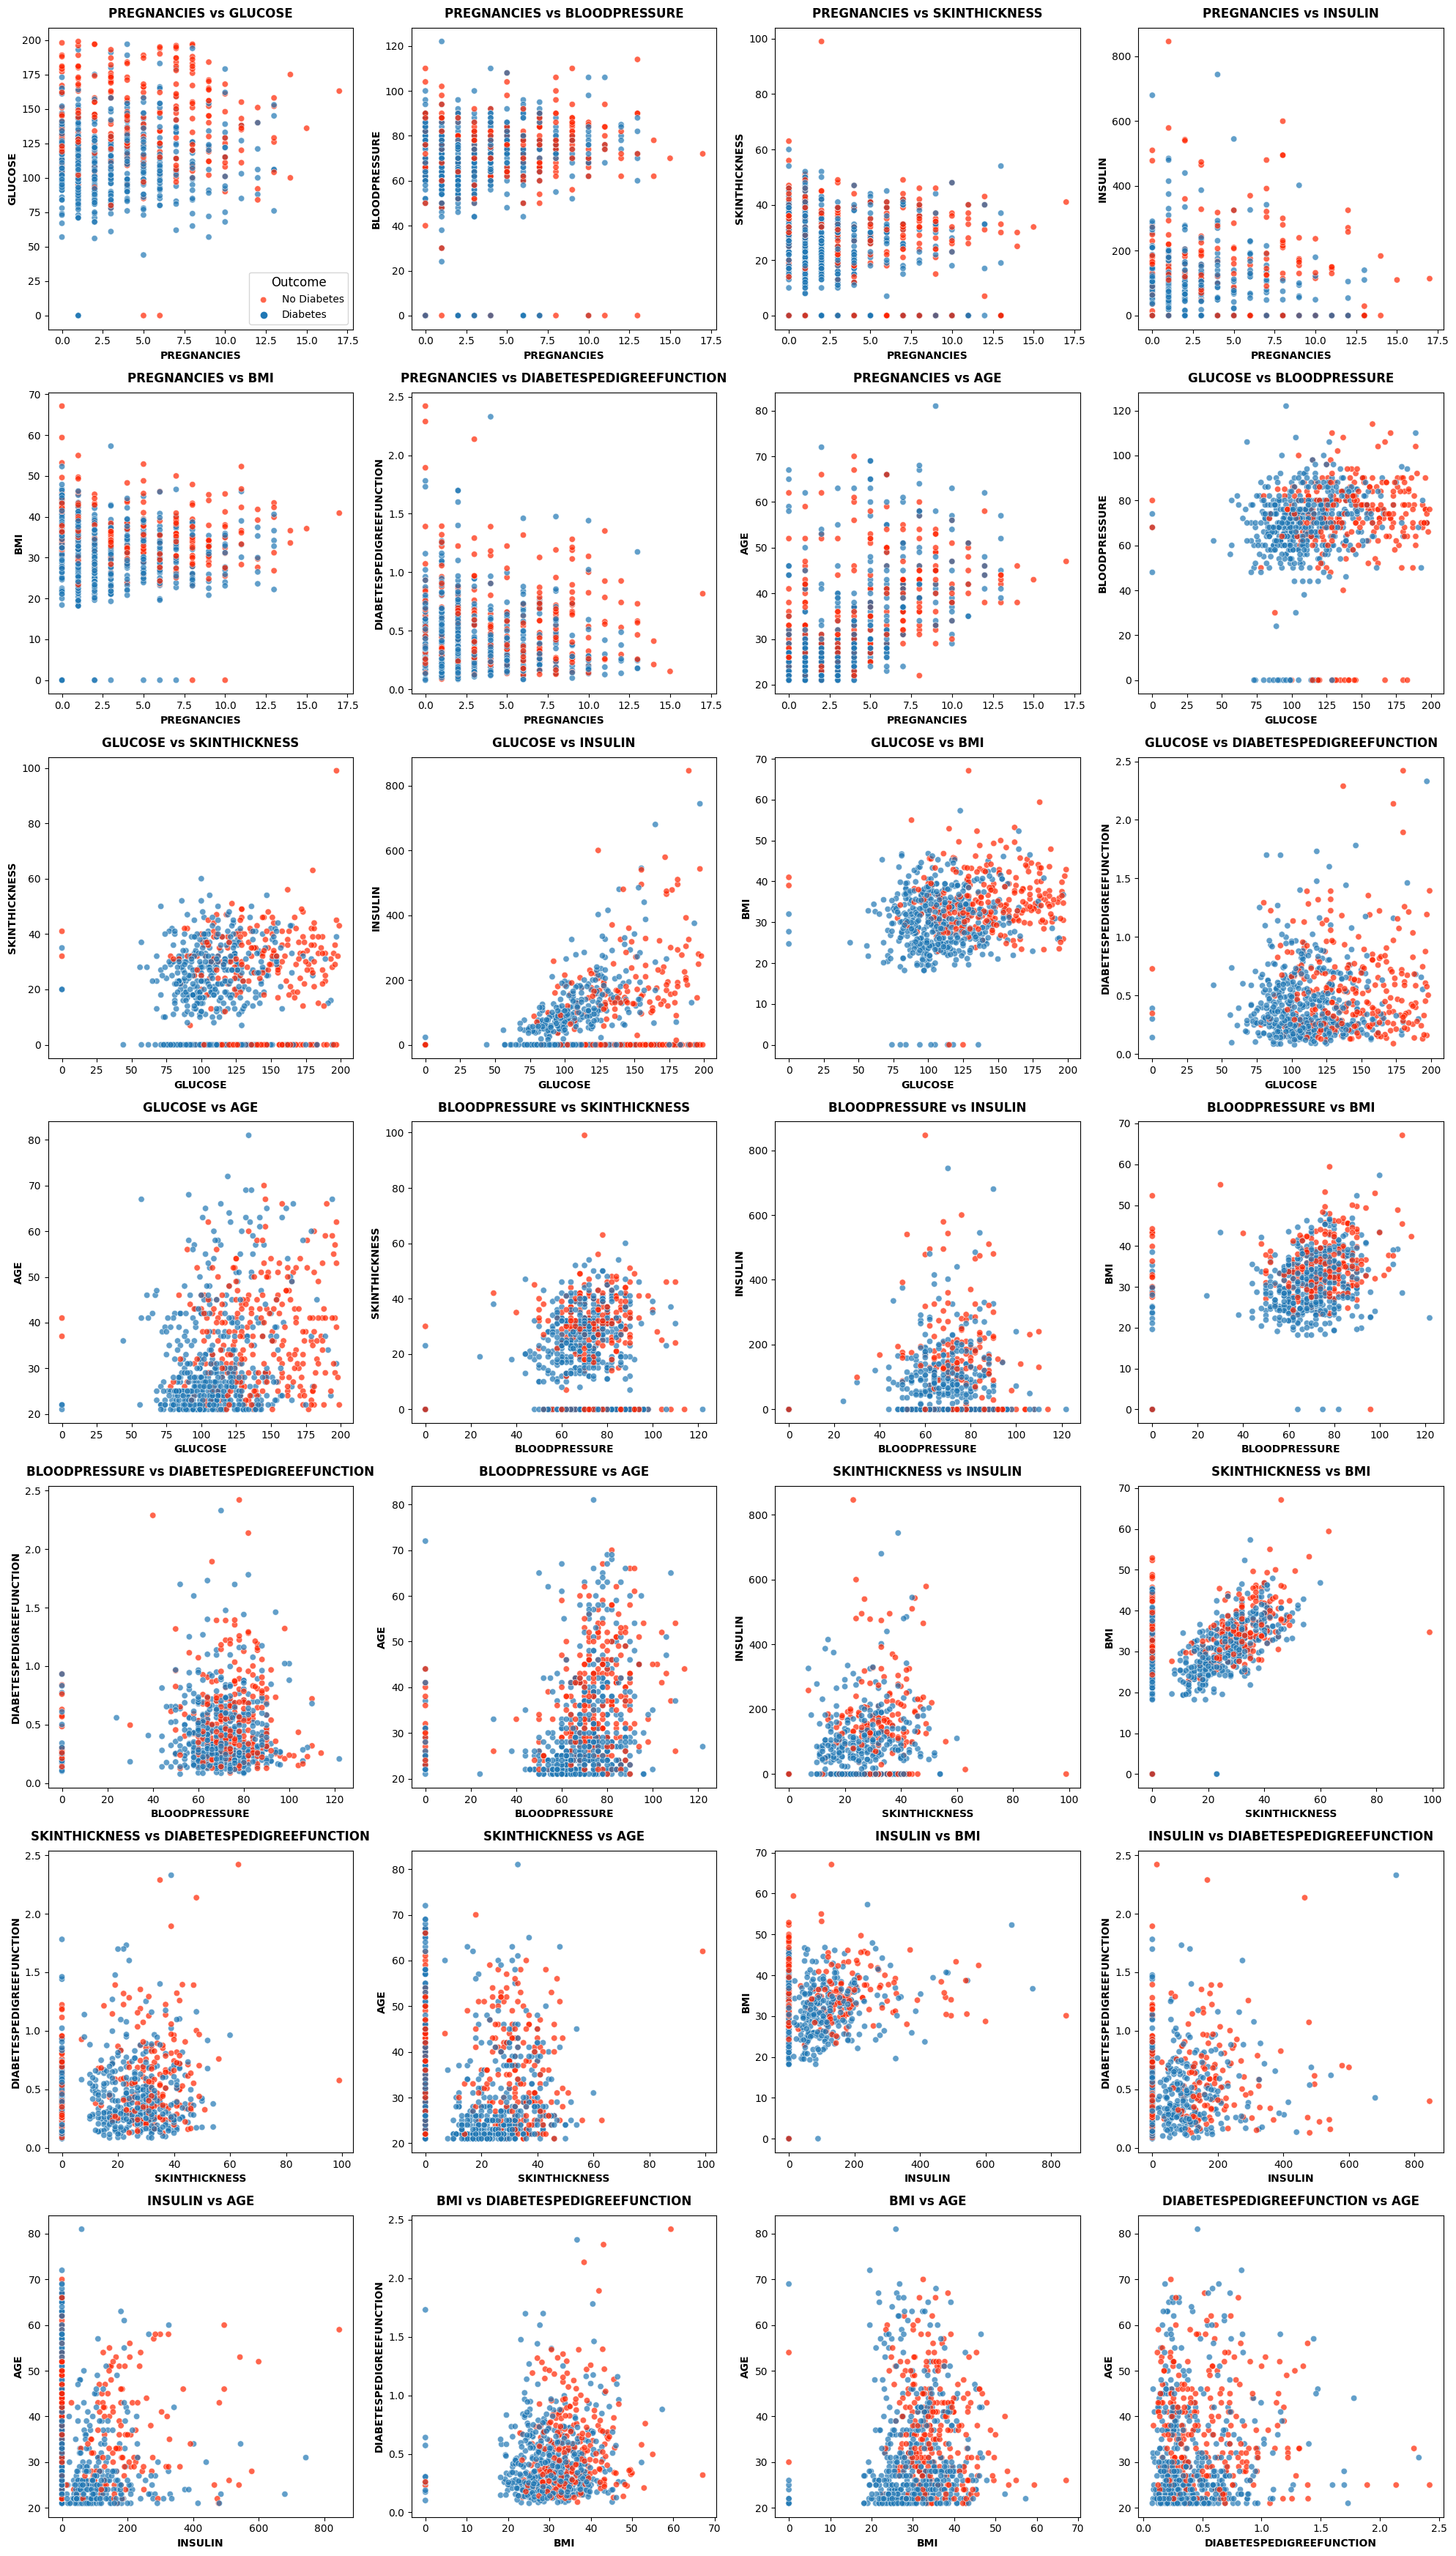

In [13]:
from itertools import combinations

palette = {0: '#1f77b4', 1: '#ff2400'}

def plot_scatter_grid(dataframe, variables, hue_var):
    num_plots = len(variables)
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.scatterplot(x=var[0], y=var[1], hue=hue_var, palette=palette, data=dataframe, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'{var[0]} vs {var[1]}', fontsize=12, fontweight='bold', pad=10) 
        axes[i].set_xlabel(var[0], fontsize=10, fontweight='bold')
        axes[i].set_ylabel(var[1], fontsize=10, fontweight='bold') 
        if i == 0:
            axes[i].legend(title='Outcome', labels=['No Diabetes', 'Diabetes'], fontsize=10, title_fontsize=12)
        else:
            axes[i].legend().remove()

    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    

comb = [col for col in df.columns if col not in 'OUTCOME']
variables = list(combinations(comb, 2))

plot_scatter_grid(df, variables, 'OUTCOME')

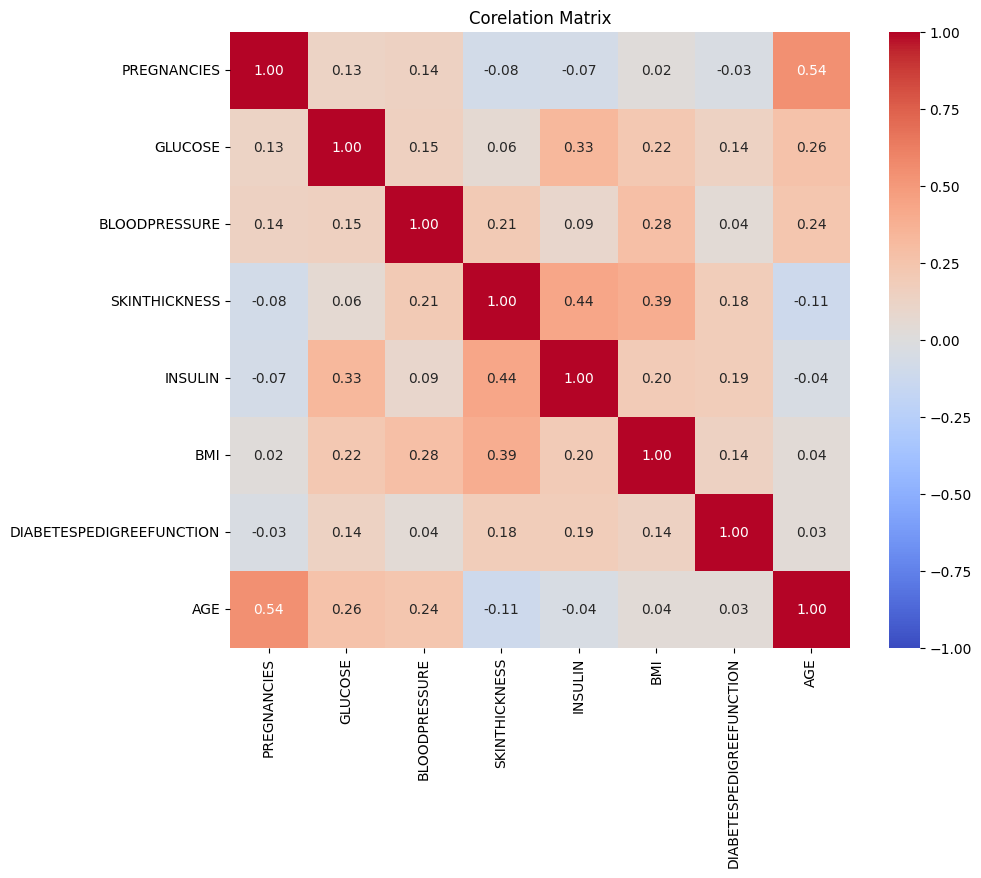

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Corelation Matrix")
plt.show();

# Base Model

In [15]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred= rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.77
Recall: 0.71
Precision: 0.59
F1: 0.64
Auc: 0.75


# Missing Value Analysis

In [16]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["PREGNANCIES", "OUTCOME"])]
zero_columns

['GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI']

In [17]:
zero_columns = ['GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI']
df[zero_columns] = df[zero_columns].replace(0, np.nan)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [18]:
df.isnull().sum()

PREGNANCIES                   0
GLUCOSE                       5
BLOODPRESSURE                35
SKINTHICKNESS               227
INSULIN                     374
BMI                          11
DIABETESPEDIGREEFUNCTION      0
AGE                           0
OUTCOME                       0
dtype: int64

In [19]:
#other solution
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])
df.isnull().sum()

PREGNANCIES                   0
GLUCOSE                       5
BLOODPRESSURE                35
SKINTHICKNESS               227
INSULIN                     374
BMI                          11
DIABETESPEDIGREEFUNCTION      0
AGE                           0
OUTCOME                       0
dtype: int64

In [20]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)


               n_miss  ratio
INSULIN           374 48.700
SKINTHICKNESS     227 29.560
BLOODPRESSURE      35  4.560
BMI                11  1.430
GLUCOSE             5  0.650


In [21]:
df[zero_columns] = df[zero_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [22]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

# Outlier Analysis

In [23]:
def outlier_thresholds(df, col_name, q1=0.10, q3=0.90):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def replace_with_thresholds(dataframe, variable, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.10, q3=0.90)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df.columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS True
INSULIN True
BMI False
DIABETESPEDIGREEFUNCTION True
AGE False
OUTCOME False


# Feature Engineering

In [24]:
df.loc[(df["AGE"] >= 21) & (df["AGE"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 50), "NEW_AGE_CAT"] = "senior"
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,mature


In [25]:
bin_BMI=[0, 18.5, 24.9, 29.9, 34.9, float("inf")]
label_BMI= ["underweight", "normal", "overweight", "obese", "extremly_obese"] 
df["BMI_CAT"] = pd.cut(df["BMI"], bins= bin_BMI , labels=label_BMI)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,BMI_CAT
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,obese
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,overweight
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,normal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,overweight
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,mature,extremly_obese


In [26]:
bin_glucose=[0, 140, 200, float("inf")]
label_glucose=["normal", "pre-diabetes", "diabetes"]
df["GLUCOSE_CAT"] = pd.cut(df["GLUCOSE"], bins=bin_glucose, labels=label_glucose)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,BMI_CAT,GLUCOSE_CAT
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,obese,pre-diabetes
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,overweight,normal
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,normal,pre-diabetes
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,overweight,normal
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,mature,extremly_obese,normal


In [27]:
bin_insulin=[0, 16, 166, float("inf")]
label_insulin=["low", "normal", "high"]
df["INSULIN_CAT"] = pd.cut(df["INSULIN"], bins=bin_insulin, labels=label_insulin)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,obese,pre-diabetes,normal
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,overweight,normal,normal
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,normal,pre-diabetes,normal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,overweight,normal,normal
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,mature,extremly_obese,normal,high


In [28]:
df["HIGH_BLOOD_PRESSURE"] = df["BLOODPRESSURE"].apply(lambda x: "high" if x>80 else "normal")
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,obese,pre-diabetes,normal,normal
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,overweight,normal,normal,normal
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,normal,pre-diabetes,normal,normal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,overweight,normal,normal,normal
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,mature,extremly_obese,normal,high,normal


In [29]:
df.loc[(df["BMI"] < 18.5) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

In [30]:
df.loc[(df["GLUCOSE"] < 70) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["GLUCOSE"] < 70) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["GLUCOSE"] >= 100) & (df["GLUCOSE"] <= 125)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["GLUCOSE"] >= 100) & (df["GLUCOSE"] <= 125)) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["GLUCOSE"] > 125) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["GLUCOSE"] > 125) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [31]:
df["NEW_GLUCOSE*INSULIN"] = df["GLUCOSE"] * df["INSULIN"]

In [32]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 8
num_cols: 9
cat_but_car: 0
num_but_cat: 1


# Encoding

In [33]:
def label_encoder(df, binary_col):
    le= LabelEncoder()
    df[binary_col] = le.fit_transform(df[binary_col])
    return df

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique()==2]

for col in binary_cols:
    df = label_encoder(df, col)
    
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_GLUCOSE*INSULIN
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,obese,1,normal,1,obesesenior,highsenior,18500.000
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,overweight,0,normal,1,obesemature,normalmature,10625.000
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,normal,1,normal,1,obesemature,highmature,22875.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,overweight,0,normal,1,obesemature,normalmature,8366.000
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,0,extremly_obese,0,high,1,obesemature,highmature,23016.000


In [34]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]

def one_hot_encoder(df, cat_cols, drop_first=False):
    df = pd.get_dummies(df, columns=cat_cols, drop_first=drop_first)
    return df

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 ]

df = one_hot_encoder(df, ohe_cols, drop_first = True)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,GLUCOSE_CAT,HIGH_BLOOD_PRESSURE,NEW_GLUCOSE*INSULIN,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_obese,BMI_CAT_extremly_obese,INSULIN_CAT_normal,INSULIN_CAT_high,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,1,1,18500.000,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,0,1,10625.000,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,1,1,22875.000,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,0,1,8366.000,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
4,0,137.000,40.000,35.000,168.000,43.100,1.949,33,1,0,0,1,23016.000,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False


# Standartization

In [35]:
num_cols
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])
df.head()

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE*INSULIN']

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,GLUCOSE_CAT,HIGH_BLOOD_PRESSURE,NEW_GLUCOSE*INSULIN,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_obese,BMI_CAT_extremly_obese,INSULIN_CAT_normal,INSULIN_CAT_high,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior
0,0.640,0.866,-0.032,0.692,-0.177,0.167,0.487,1.426,1,1,1,1,0.061,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False
1,-0.845,-1.205,-0.528,-0.009,-0.177,-0.852,-0.370,-0.191,0,0,0,1,-0.552,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
2,1.234,2.017,-0.694,-0.009,-0.177,-1.333,0.627,-0.106,1,0,1,1,0.402,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,-0.845,-1.074,-0.528,-0.709,-0.609,-0.634,-0.941,-1.042,0,0,0,1,-0.728,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
4,-1.142,0.504,-2.679,0.692,0.421,1.549,4.593,-0.020,1,0,0,1,0.413,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False


# ML Model

In [36]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.73
Precision: 0.65
F1: 0.69
Auc: 0.77


# Feature Importance

    Value                            Feature
1   0.142                            GLUCOSE
11  0.141                NEW_GLUCOSE*INSULIN
5   0.106                                BMI
7   0.101                                AGE
6   0.096           DIABETESPEDIGREEFUNCTION
0   0.073                        PREGNANCIES
2   0.058                      BLOODPRESSURE
3   0.055                      SKINTHICKNESS
4   0.054                            INSULIN
9   0.053                        GLUCOSE_CAT
25  0.020   NEW_AGE_GLUCOSE_NOM_normalmature
21  0.019     NEW_AGE_GLUCOSE_NOM_highmature
13  0.012                 BMI_CAT_overweight
14  0.011                      BMI_CAT_obese
10  0.011                HIGH_BLOOD_PRESSURE
12  0.010                     BMI_CAT_normal
15  0.008             BMI_CAT_extremly_obese
8   0.006                        NEW_AGE_CAT
16  0.006                 INSULIN_CAT_normal
17  0.006                   INSULIN_CAT_high
18  0.005        NEW_AGE_BMI_NOM_obesesenior
22  0.004 

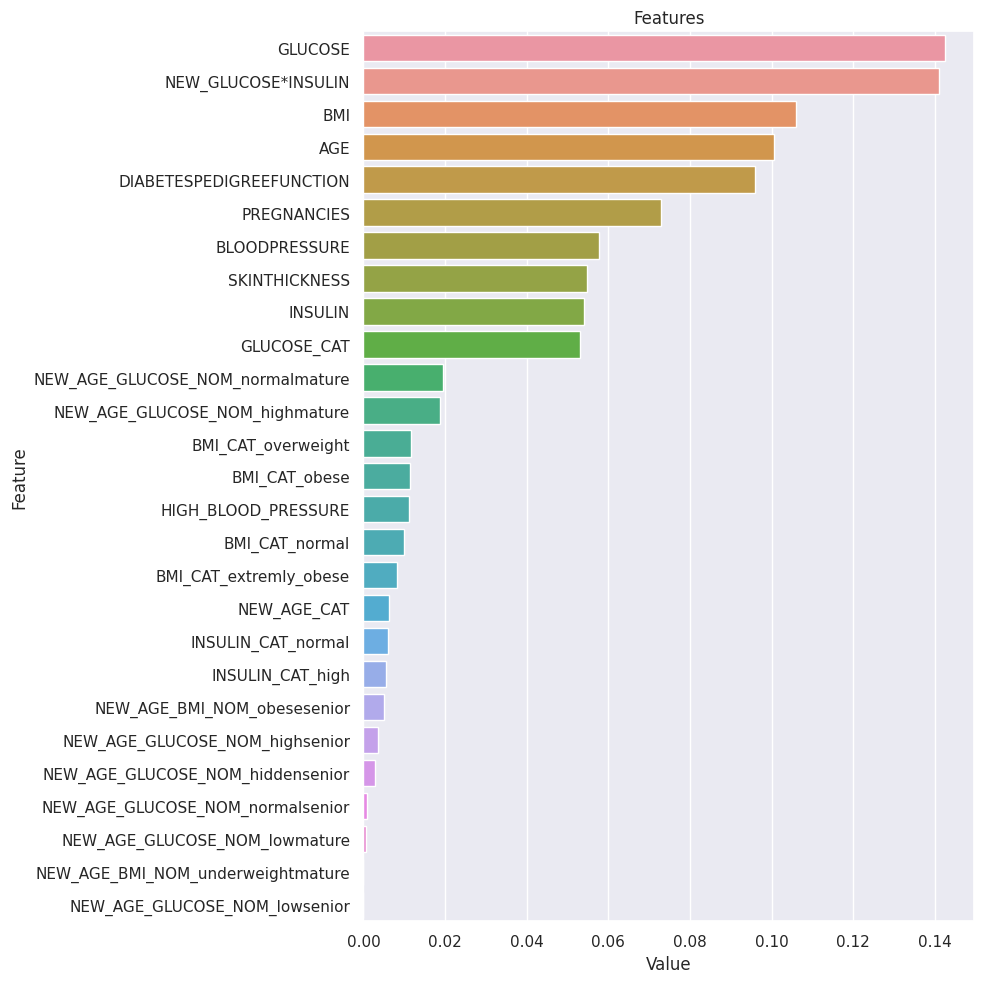

In [37]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)
